# Pandas Series
- matplotlib, numpy, **pandas**, seaborn, scikit-learn, stats, scipy, ... 

<hr style="border:2px solid gray">

## Some comparisons

______


- <b>Numpy</b>: Arrays
- <b>Pandas</b>: Series and Dataframes

___________ 

<b>Series vs Dataframes</b>:
- <u><b>Series<b/></u>: 
    - like a numpy array, but with some additional functionality. 
    - Imagine a single column of a table.  

- <u><b>Dataframes</b></u>: 
    - Imagine the entire table. 

______

<b>How is a series different from a list?</b> 

- Series contains an index, which can be thought of as a row name (often is a row number), which is a way to reference items. The index is stored with other meta-information (information about the series).   

- the elements are of a specific data type. The data type is inferred, but can be manually specified. 


<hr style="border:2px solid gray">

## Imports

In [1]:
import pandas as pd
import numpy as np
from pydataset import data

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
If you had an error with importing data, in your terminal type:
        
```pip install pydataset```   
        </div>

<hr style="border:1px solid black">

## How to Create a Series

1. from a list
2. from a numpy array
3. from a dataframe
4. from a dictionary

### Create a Series from a List

In [2]:
my_list = [2, 3, 5]
type(my_list)

list

In a list, you can use an index to access value in list, and those indices are integers representing location. These indices in a list cannot be changed to be a name, datetime, etc. 

In [3]:
my_list[0]

2

*but* if we create a series from the list, similar to how you would convert a list to an array with numpy...

In [4]:
my_array = np.array(my_list)
print(type(my_array))

<class 'numpy.ndarray'>


we can create a series from the list...

In [5]:
my_series = pd.Series(my_list)

print(type(my_series))

<class 'pandas.core.series.Series'>


what's inside the series? 

In [6]:
my_series

0    2
1    3
2    5
dtype: int64

- 3 rows, with the row indices (or row names) as [0, 1, 2]
- the values are [2, 3, 5]
- the datatype is int64 (i.e. will store LARGE integers ;))

<hr style="border:1px solid black">

### Create a Series from an array

In [7]:
my_array = np.array([8.0, 13.0, 21.0])

In [8]:
my_series = pd.Series(my_array)

In [9]:
my_series

0     8.0
1    13.0
2    21.0
dtype: float64

- 3 rows, with the row indices as [0, 1, 2]
- the values are [8.0, 13.0, 21.0]
- the datatype is float64

<hr style="border:1px solid black">

### Create a Series from a dataframe

- This can be done in two ways:
    - Option 1: dot notation
    - Option 2: bracket notation

In [10]:
#assign the dataframe to a variable
sleep_df = data('sleepstudy')

#take a look at the df
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<div class="alert alert-block alert-info">
<b>Note:</b> 
    
A Series consists of one column, so attempting to create a Series from a multi-column dataframe will not work.
    
```pd.Series(my_df)```

</div>

Create a Series from one column of the dataframe

**Option 1: dot notation**

`my_df.column_name`

In [12]:
my_series = my_df.Reaction
print(type(my_series))
type(my_series)

<class 'pandas.core.series.Series'>


pandas.core.series.Series

**Option 2: bracket notation**


`my_df[column_name]`

In [13]:
my_series = my_df['Reaction']
print(type(my_series))

<class 'pandas.core.series.Series'>


In [14]:
my_series.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

**What happens when you do a double bracket?**

`my_df[[column_name]]`

In [15]:
df2 = my_df[['Reaction']]
type(df2)

pandas.core.frame.DataFrame

**See first 5 rows**

`my_series.head()`

In [16]:
my_series.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

In [17]:
df2.head()

,Reaction
1,249.5600
2,258.7047
3,250.8006
4,321.4398
5,356.8519


<hr style="border:1px solid black">

### Create a Series from a dataframe

In [90]:
labeled_series = pd.Series({'a' : 0, 'b' : 1.5, 'c' : 2, 'd': 3.5, 'e': 4, 'f': 5.5})
labeled_series

a    0.0
b    1.5
c    2.0
d    3.5
e    4.0
f    5.5
dtype: float64

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
When you create a Series from a dictionary, the index is created using the key from the 'key/value' pair in the dictionary.

</div>

### Summary

Create series 

...from list, array, dictionary

In [18]:
s1 = pd.Series(my_list)

...from existing dataframe

In [19]:
s2 = my_df.Reaction

<hr style="border:2px solid black">

## Pandas Datatypes

Data types you will see in series and dataframes: 

- int: integer, whole number values  
- float: decimal numbers  
- bool: true or false values  
- object: strings  
- category: a fixed set of string values  
- a name, an optional human-friendly name for the series  

There are 2 ways a new Series gets its data type...

1. Inference of data type
2. Assignment of data type

_______________________________

1. Inference of data types: when creating the series, Pandas infers the data type based on the data entered. 

In [20]:
pd.Series([True, False, True])

0     True
1    False
2     True
dtype: bool

In [21]:
pd.Series(['I', 'Love', 'Codeup'])

0         I
1      Love
2    Codeup
dtype: object

In [22]:
my_series = pd.Series([1, 3, 'Five'])
my_series

0       1
1       3
2    Five
dtype: object

In [23]:
my_new_series = my_series[my_series != 'Five']
my_new_series

0    1
1    3
dtype: object

2. Assignment of data type: Using `astype()` to assign data types

In [24]:
my_new_series.astype('int')

0    1
1    3
dtype: int64

If we try to assign a data type to data that cannot be coerced into that type, we will get an error. 
For example, If we assign the series, my_series, to an integer type, Pandas will return error becuase it can't convert 'five'to an int. 

In [25]:
# the following will return an error because it doesn't have the ability to cast the word five to an int.
# my_series.astype('int')

In [26]:
my_df['Subject'].astype('str')

1      308
2      308
3      308
4      308
5      308
      ... 
176    372
177    372
178    372
179    372
180    372
Name: Subject, Length: 180, dtype: object

### Summary

- Pandas will infer datatypes
- You can change datatypes upon creating the series `pd.Series(mylist).astype('int')` or later using "astype(x)" where x can be 'float', 'int', 'str', e.g. `myseries.astype('str')`
- astype('str') will show the series dtype = object. 

<hr style="border:2px solid gray">

## Vectorized Operations

Like numpy arrays, pandas series are vectorized by default. E.g., we can easily use the basic arithmetic operators to manipulate every element in the series.

First, let's create 2 series, s1 and s2:

In [27]:
s1 = pd.Series([2, 3, 5, 8])
s1.head()

0    2
1    3
2    5
3    8
dtype: int64

In [28]:
s2 = my_df.Reaction
s2.head()

1    249.5600
2    258.7047
3    250.8006
4    321.4398
5    356.8519
Name: Reaction, dtype: float64

We will now perform arithmetic operations followed by comparison operations...

In [29]:
s1+1

0    3
1    4
2    6
3    9
dtype: int64

In [30]:
s1/2

0    1.0
1    1.5
2    2.5
3    4.0
dtype: float64

Now, comparison operations

In [31]:
s1 >= 5

0    False
1    False
2     True
3     True
dtype: bool

In [32]:
(s1 >= 3) & (s2 % 2 == 0)

0      False
1      False
2      False
3      False
4      False
       ...  
176    False
177    False
178    False
179    False
180    False
Length: 181, dtype: bool

### Summary

- Just as in Numpy, we can perform operations on each element in the series by simply applying the series, s + 1, s/2, s == 3, etc. and each will be evaluated. 

- a series is always returned
- a series of booleans if we are giving condition statements. 
- a series of transformed values if we are doing an arithmetic operation. 



<hr style="border:2px solid gray">

# Series Attributes
`.index`: returns a RangeIndex showing our "start" "stop" and "step"

In [33]:
s1.index

RangeIndex(start=0, stop=4, step=1)

In [34]:
list(s1.index)

[0, 1, 2, 3]

`.values`: returns the individual value of each row as an array

In [35]:
s1.values

array([2, 3, 5, 8])

In [36]:
type(s1.values)

numpy.ndarray

`.size`: returns the number of rows in the series

In [37]:
s1.size

4

`.shape`: returns the rows and columns of the series (mainly used on dataframes)

In [38]:
s1.shape

(4,)

<hr style="border:2px solid gray">

## Series Methods

### Methods to get glimpses into the series

`.head()`: returns the 1st 5 rows (max) of the series

In [39]:
s1.head()

0    2
1    3
2    5
3    8
dtype: int64

In [40]:
s1.head(2)

0    2
1    3
dtype: int64

In [41]:
s2.head(10)

1     249.5600
2     258.7047
3     250.8006
4     321.4398
5     356.8519
6     414.6901
7     382.2038
8     290.1486
9     430.5853
10    466.3535
Name: Reaction, dtype: float64

`.tail()`: returns the last 5 rows of the series

In [42]:
s2.tail()

176    329.6076
177    334.4818
178    343.2199
179    369.1417
180    364.1236
Name: Reaction, dtype: float64

In [43]:
s2.tail(3)

178    343.2199
179    369.1417
180    364.1236
Name: Reaction, dtype: float64

`.value_counts()`: count number of records/items/rows containing each unique value (think "group by")

```sql
select Days, count(Subject) from my_df group by Days;
```

In [44]:
my_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [45]:
s3 = my_df.Days
s3.value_counts(dropna=False)

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

### Methods to test whether a value or condition exists in the series

`.any()`: returns a single boolean...do any values in the series meet the condition? 

In [46]:
(s1 > 3).any()

True

`.all()`: returns a single boolean...do all values in the series meet the condition? 

In [47]:
(s1 > 3).all()

False

`.isin()`: comparing string of each item in series to a list of strings. Is the string in your series found in the list of strings? Returns a series of boolean values. 
In other words, use `isin()` to tell whether each value is in a set of known values. 

In [48]:
vowels = list('aeiouy')
vowels

['a', 'e', 'i', 'o', 'u', 'y']

In [49]:
letters = list('abcdefghijklminow')
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'i',
 'n',
 'o',
 'w']

In [50]:
letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    i
14    n
15    o
16    w
dtype: object

In [51]:
letters_series.isin(vowels)

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13     True
14    False
15     True
16    False
dtype: bool

In [52]:
letters_series.isin(vowels).value_counts()

False    12
True      5
dtype: int64

In [53]:
letters_series.isin(vowels).any()

True

### Methods for Descriptive statistics

- `count()`
- `sum()`
- `mean()`
- `median()`
- `min()`
- `max()`
- `mode()`
- `abs()`
- `std()`
- `quantile()`

In [54]:
s2.count()

180

In [55]:
{
    'count': s2.count(),
    'sum': s2.sum(),
    'mean': s2.mean(),
    'median': s2.median()
}

{'count': 180,
 'sum': 53731.42049999999,
 'mean': 298.50789166666664,
 'median': 288.6508}

Above returns a dictionary. 

In [56]:
s2.describe()

count    180.000000
mean     298.507892
std       56.328757
min      194.332200
25%      255.375825
50%      288.650800
75%      336.752075
max      466.353500
Name: Reaction, dtype: float64

In [57]:
type(s2.describe())

pandas.core.series.Series

### Applying other functions to each item in a series

- Define the function: `def myfcn()` then do `my_series.apply(myfcn)`
- OR Use the .apply method with lambda: `my_series.apply(lambda n: <myfuction>)`

In [58]:
def even_or_odd(n):
    '''
    this function takes a number and returns a string indicating whether
    the passed number is even or odd.
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

In [59]:
s1.apply(even_or_odd)

0    even
1     odd
2     odd
3    even
dtype: object

In [60]:
s1.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0    even
1     odd
2     odd
3    even
dtype: object

### Vectorized String Operations

In [61]:
s4 = pd.Series(['Madeleine', 'Misty', 'John', 'John', 'Ryan', 'Ryan', 'Adam', 'Adam', 'Margaret'])

How do we convert all to lower case? 

We could do this...`series.apply(lambda s: s.lower())`

In [62]:
s4.apply(lambda s: s.lower())

0    madeleine
1        misty
2         john
3         john
4         ryan
5         ryan
6         adam
7         adam
8     margaret
dtype: object

...but, why when we have the str property?? `series.str.lower()`

Once we access the .str property, we can treat the resulting value as if it were a string. In our case, we called the .lower method, which will convert all the strings in the series to lower case.

In [63]:
s4.str.lower()

0    madeleine
1        misty
2         john
3         john
4         ryan
5         ryan
6         adam
7         adam
8     margaret
dtype: object

We can use the replace method to correct my name. It's NOT Margaret! 

In [64]:
s4 = s4.str.replace('rgaret', 'ggie')
s4

0    Madeleine
1        Misty
2         John
3         John
4         Ryan
5         Ryan
6         Adam
7         Adam
8       Maggie
dtype: object

### Summary

Methods look like functions, but you can tell they are methods because they start with the series variable name followed by the .method_name(), such as my_series.count(). Whereas pandas functions will begin with pd.concat(s1, s2). 

We talked about 

1. Methods to get glimpses into the series

2. Methods to test whether a value or condition exists in the series

3. Methods for Descriptive statistics

4. Methods for Applying other functions to each item in a series

5. Vectorized String Operations

__________________________________________
__________________________________________


## Subsetting & Indexing

In [65]:
s2.describe()

count    180.000000
mean     298.507892
std       56.328757
min      194.332200
25%      255.375825
50%      288.650800
75%      336.752075
max      466.353500
Name: Reaction, dtype: float64

Find the 75th percentile

In [66]:
s2.describe()['75%']

336.752075

Find all where response time is > 3rd quartile, using the identified the cutoff for 3rd to 4th quartile. 

In [67]:
s2_descriptive_series = s2.describe()
q3 = s2_descriptive_series['75%']
q3

336.752075

In [68]:
s2_descriptive_series[0]

180.0

In [69]:
s2_descriptive_series['count':'std']
s2_descriptive_series[2:5]

std     56.328757
min    194.332200
25%    255.375825
Name: Reaction, dtype: float64

In [70]:
s2[s2 > q3].head()

5     356.8519
6     414.6901
7     382.2038
9     430.5853
10    466.3535
Name: Reaction, dtype: float64

Create a new series that contains labels of 'q4' if the value is above the 3rd q, or 'q1-q3' if not. 

In [71]:
s2.apply(lambda n: 'q4' if n > q3 else 'q1-q3')

1      q1-q3
2      q1-q3
3      q1-q3
4      q1-q3
5         q4
       ...  
176    q1-q3
177    q1-q3
178       q4
179       q4
180       q4
Name: Reaction, Length: 180, dtype: object

Filter our letters series 

In [72]:
letters_series[letters_series.isin(vowels)]

0     a
4     e
8     i
13    i
15    o
dtype: object

Another filter while using a method

In [73]:
ds_team_series = pd.Series(['Adam', 'Adam', 'Amanda', 'Andrew', 'Carina', 'John', 'John', 
                            'Madeleine', 'Misty', 'Maggie', 'Ryan', 'Tasha'
                           ])

In [74]:
ds_team_series.str.startswith('A')

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [75]:
ds_team_series[ds_team_series.str.startswith('A')]

0      Adam
1      Adam
2    Amanda
3    Andrew
dtype: object

## Numerical to Categorical Values - Binning & Cutting

`cut()` put numerical values into discrete bins. 

We can let pandas create bins of even intervals, or we can specify the bins to create. 

In [76]:
s2_minutes = s2/60

In [77]:
s2_minutes.max()

7.7725583333333335

In [78]:
s2_bins = pd.cut(s2_minutes, 4)
s2_bins

1      (3.234, 4.372]
2      (3.234, 4.372]
3      (3.234, 4.372]
4      (4.372, 5.506]
5      (5.506, 6.639]
            ...      
176    (4.372, 5.506]
177    (5.506, 6.639]
178    (5.506, 6.639]
179    (5.506, 6.639]
180    (5.506, 6.639]
Name: Reaction, Length: 180, dtype: category
Categories (4, interval[float64, right]): [(3.234, 4.372] < (4.372, 5.506] < (5.506, 6.639] < (6.639, 7.773]]

In [79]:
s2_bins.value_counts()

(4.372, 5.506]    75
(3.234, 4.372]    53
(5.506, 6.639]    44
(6.639, 7.773]     8
Name: Reaction, dtype: int64

In [80]:
# define the bins

s2_bins2 = pd.cut(s2_minutes, [3, 4, 5, 6, 7, 8])
s2_bins2

1      (4, 5]
2      (4, 5]
3      (4, 5]
4      (5, 6]
5      (5, 6]
        ...  
176    (5, 6]
177    (5, 6]
178    (5, 6]
179    (6, 7]
180    (6, 7]
Name: Reaction, Length: 180, dtype: category
Categories (5, interval[int64, right]): [(3, 4] < (4, 5] < (5, 6] < (6, 7] < (7, 8]]

In [81]:
s2_bins2.value_counts()

(4, 5]    74
(5, 6]    51
(3, 4]    28
(6, 7]    22
(7, 8]     5
Name: Reaction, dtype: int64

## Plotting

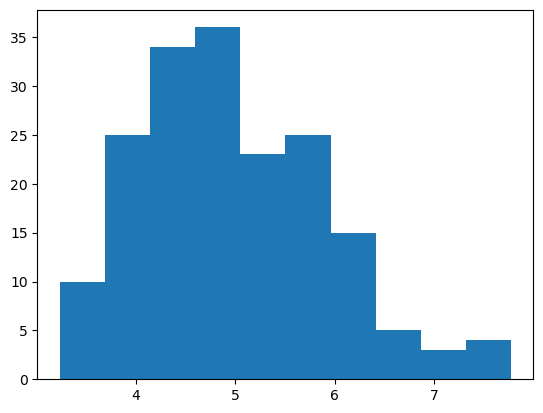

In [82]:
import matplotlib.pyplot as plt
plt.hist(s2_minutes)
plt.show()

In [83]:
s2_bins = pd.cut(s2_minutes, 10)

s2_bins_value_counts = s2_bins.value_counts(sort=False)

# s2_bins.value_counts()

<AxesSubplot:>

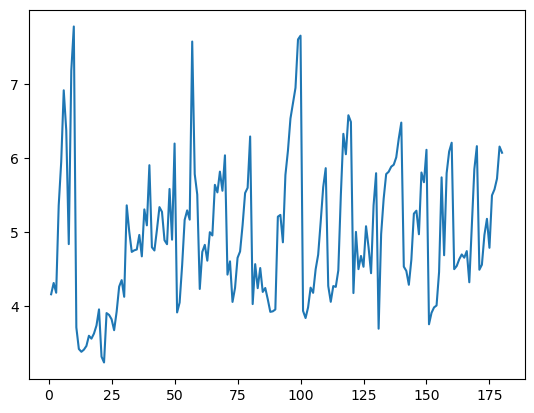

In [84]:
s2_minutes.plot()

<AxesSubplot:>

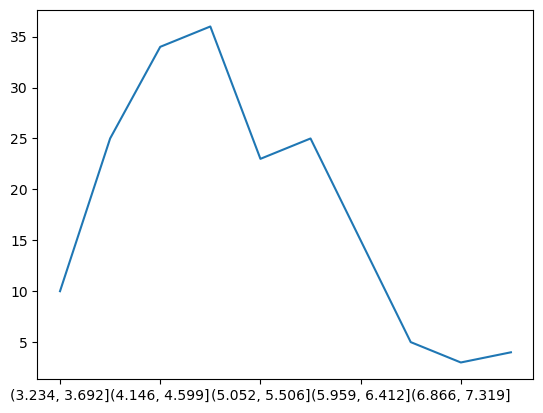

In [85]:
s2_bins_value_counts.plot()

<AxesSubplot:ylabel='Frequency'>

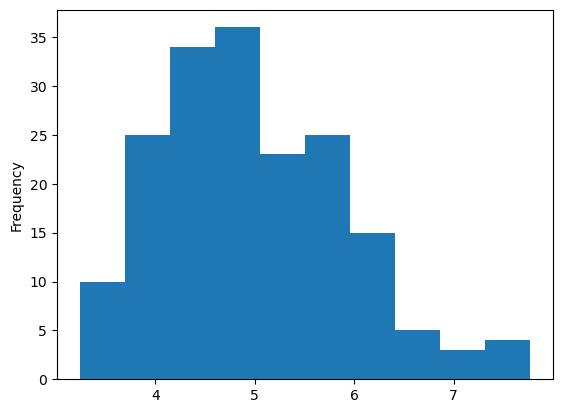

In [86]:
s2_minutes.plot.hist()

In [87]:
# reaction_bins_series.value_counts().plot.bar(color='slateblue', width=.9)
# plt.title('Reaction Time Bins')

<AxesSubplot:>

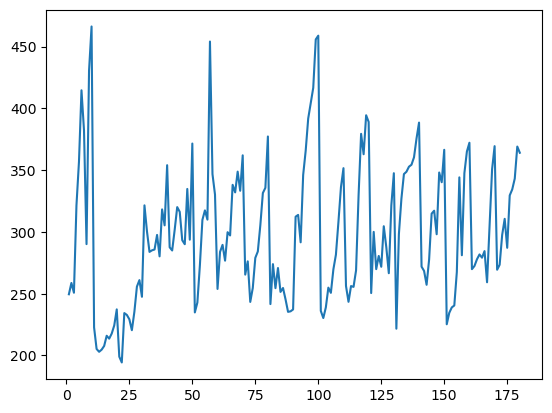

In [88]:
s2.plot()

<AxesSubplot:ylabel='Frequency'>

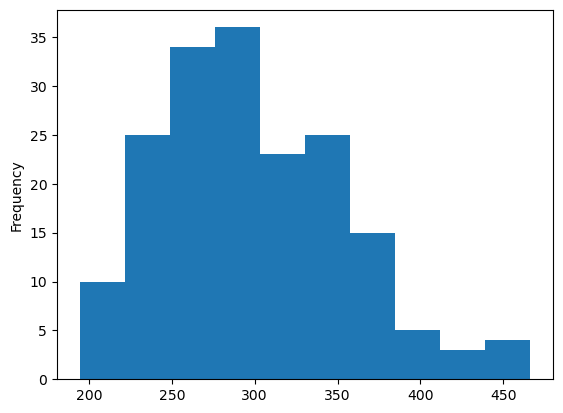

In [89]:
s2.plot.hist()